In [1]:
# import xenaPython as xena
from statistics import median, mean
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.impute import SimpleImputer 
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedBaggingClassifier, RUSBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pickle
import joblib
import os
from scipy.stats import f_oneway
import seaborn as sns

from scipy.stats import ttest_ind
from collections import Counter
from time import time
import multiprocessing
from sklearn.metrics import confusion_matrix

In [ ]:
# def handling_missing_values(d, stages, data, samples):
#   l=[]
#   for i in range(len(stages)):
#     if stages[i]=='NaN' or stages[i]==0:
#       l.append(i)
#     else:
      
#       stages[i]=d[str(stages[i])]
#       #pass
#   l = set(l)
#   stagetemp = []
#   datatemp = []
#   samplestemp = []

#   print("Without Removing=", Counter(stages))
#   for i in range(len(stages)):
#     if i not in l:
#       stagetemp.append(stages[i])
#       datatemp.append(data[i])
#       samplestemp.append(samples[i])
#     # stages.pop(i)
#     # data.pop(i)
#     # samples.pop(i)
#   stages = stagetemp
#   data = datatemp
#   samples = samplestemp
#   print("After Removing=", Counter(stages))

#   data=imputing(data)
#   print( "--- Data Pre-Processing Completed ---")

#   return (stages, data, samples)

# def imputing(data):
#   imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#   imputer.fit(data) 
#   data=imputer.transform(data)
#   return data

In [ ]:
# hub="https://tcga.xenahubs.net"
# hub_phenotype = "https://tcga.xenahubs.net"
# data_set_name="TCGA.OV.sampleMap/HumanMethylation27" # TGCA ovarian 27k
# data_set_name_phenotype="TCGA.OV.sampleMap/OV_clinicalMatrix"

# # hub="https://tcga.xenahubs.net"
# # hub_phenotype="https://pancanatlas.xenahubs.net"
# # data_set_name="TCGA.PANCAN.sampleMap/HumanMethylation27" 
# # data_set_name_phenotype="Survival_SupplementalTable_S1_20171025_xena_sp"


# samples=xena.dataset_samples(hub, data_set_name,limit=10000)
# print("Number of samples:",len(samples))
# features=xena.dataset_field (hub, data_set_name)  
# print("Number of features:",len(features))
# data=xena.dataset_probe_values(hub, data_set_name, samples, features)[1] # 2d list with 1st list --> values of first cpg marker
# data= list(map(list, zip(*data)))
# stages=xena.dataset_probe_values(hub_phenotype, data_set_name_phenotype, samples, ["clinical_stage"])[1][0]

# print("Distribution of labels:",Counter(stages))
# # stages, data, samples =handling_missing_values({'1':1,'2':0,'3':0,'4':1,'5':0,'6':0,'7':0,'8':0,'9':0,'10':0}, stages, data, samples)



In [ ]:
# stages


In [2]:
data = pd.read_csv("data.csv")
print(data)
features = data.drop(["id","diagnosis", "Unnamed: 32"],axis=1)
labels = data.diagnosis


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [3]:
print(labels)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [4]:
print(labels.value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [5]:
labels = labels.replace({"B":0, "M":1})

In [6]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [7]:
features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# train and test set

In [8]:
import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, labels, test_size=0.2)

In [9]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
274,17.930,24.48,115.20,998.9,0.08855,0.07027,0.056990,0.04744,0.1538,0.05510,...,20.92,34.69,135.10,1320.0,0.13150,0.18060,0.20800,0.11360,0.2504,0.07948
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.027100,0.01406,0.1506,0.06959,...,12.02,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
454,12.620,17.15,80.62,492.9,0.08583,0.05430,0.029660,0.02272,0.1799,0.05826,...,14.34,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330
69,12.780,16.49,81.37,502.5,0.09831,0.05234,0.036530,0.02864,0.1590,0.05653,...,13.46,19.76,85.67,554.9,0.12960,0.07061,0.10390,0.05882,0.2383,0.06410
53,18.220,18.70,120.30,1033.0,0.11480,0.14850,0.177200,0.10600,0.2092,0.06310,...,20.60,24.13,135.10,1321.0,0.12800,0.22970,0.26230,0.13250,0.3021,0.07987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,13.640,15.60,87.38,575.3,0.09423,0.06630,0.047050,0.03731,0.1717,0.05660,...,14.85,19.05,94.11,683.4,0.12780,0.12910,0.15330,0.09222,0.2530,0.06510
222,10.180,17.53,65.12,313.1,0.10610,0.08502,0.017680,0.01915,0.1910,0.06908,...,11.17,22.84,71.94,375.6,0.14060,0.14400,0.06572,0.05575,0.3055,0.08797
473,12.270,29.97,77.42,465.4,0.07699,0.03398,0.000000,0.00000,0.1701,0.05960,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743
147,14.950,18.77,97.84,689.5,0.08138,0.11670,0.090500,0.03562,0.1744,0.06493,...,16.25,25.47,107.10,809.7,0.09970,0.25210,0.25000,0.08405,0.2852,0.09218


Text(0.5, 1.0, 'Correlation Matrix')

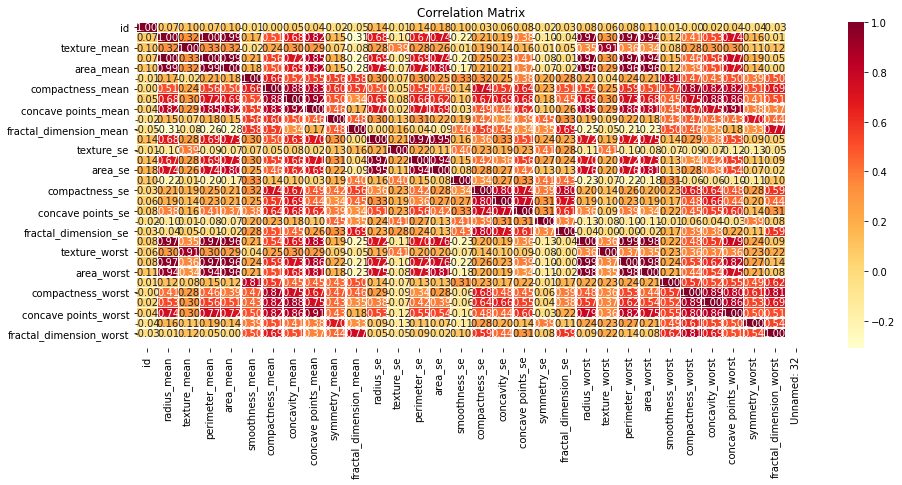

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,fmt=".2f",cmap="YlOrRd")
plt.title("Correlation Matrix")

In [11]:
'''
Variance Threshold
The variance threshold is a simple baseline approach to feature selection. 
It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, 
i.e., features that have the same value in all samples. We assume that features with a higher variance may contain more 
useful information, but note that we are not taking the relationship between feature variables or feature and target variables 
into account, which is one of the drawbacks of filter methods.

'''


from sklearn.feature_selection import VarianceThreshold
v_threshold = VarianceThreshold(threshold=0.5)
v_threshold.fit(x_train)
print(v_threshold.get_support())
print(x_train.columns)

[ True  True  True  True False False False False False False False False
  True  True False False False False False False  True  True  True  True
 False False False False False False]
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


c:\users\juhi pandey\appdata\local\programs\python\python37-32\lib\site-packages\skfeature\utility\construct_W.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  class_idx_all = (class_idx[:, np.newaxis] & class_idx[np.newaxis, :])
c:\users\juhi pandey\appdata\local\programs\python\python37-32\lib\site-packages\skfeature\utility\construct_W.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  class_idx_all = (class_idx[:, np.newaxis] & class_idx[np.newaxis, :])


[ 2 22  7  9 27  6 29 26 23  3 24  4 19 17 16  8  1 12  5 28 25 21  0 14
 13 15 10 11 20 18]


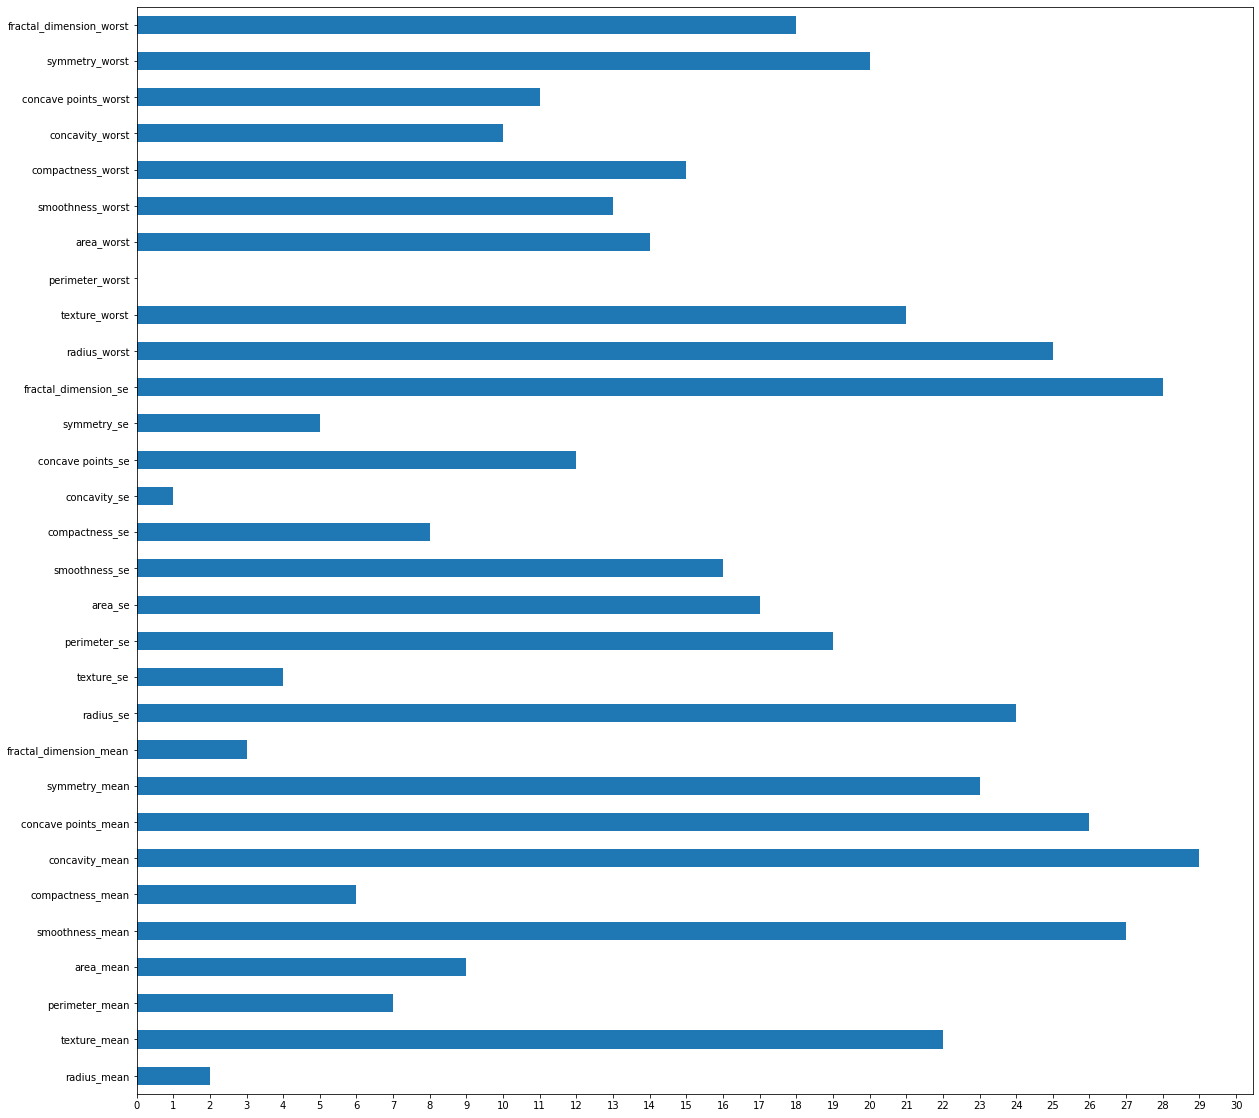

In [20]:
# VERY CONFUSED

'''
Fisher’s Score
Fisher score is one of the most widely used supervised feature selection methods. 
The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. 
We can then select the variables as per the case.
'''
# pip install skfeature-chappers

# %matplotlib inline
from skfeature.function.similarity_based import fisher_score

ranks = fisher_score.fisher_score(x_train.values, y_train, mode='rank') #returns rank directly instead of fisher score. so no need for feature_ranking
print(ranks)


# ranks = fisher_score(x_train, labels)
plt.figure(figsize=(20, 20))
plt.xticks([i for i in range(31)])
plt.grid(True)
feat_importances = pd.Series(ranks, x_train.columns)
feat_importances.plot(kind='barh')
plt.show()



# 19 ko threshold rakh ke top 10 aa rahe hain le

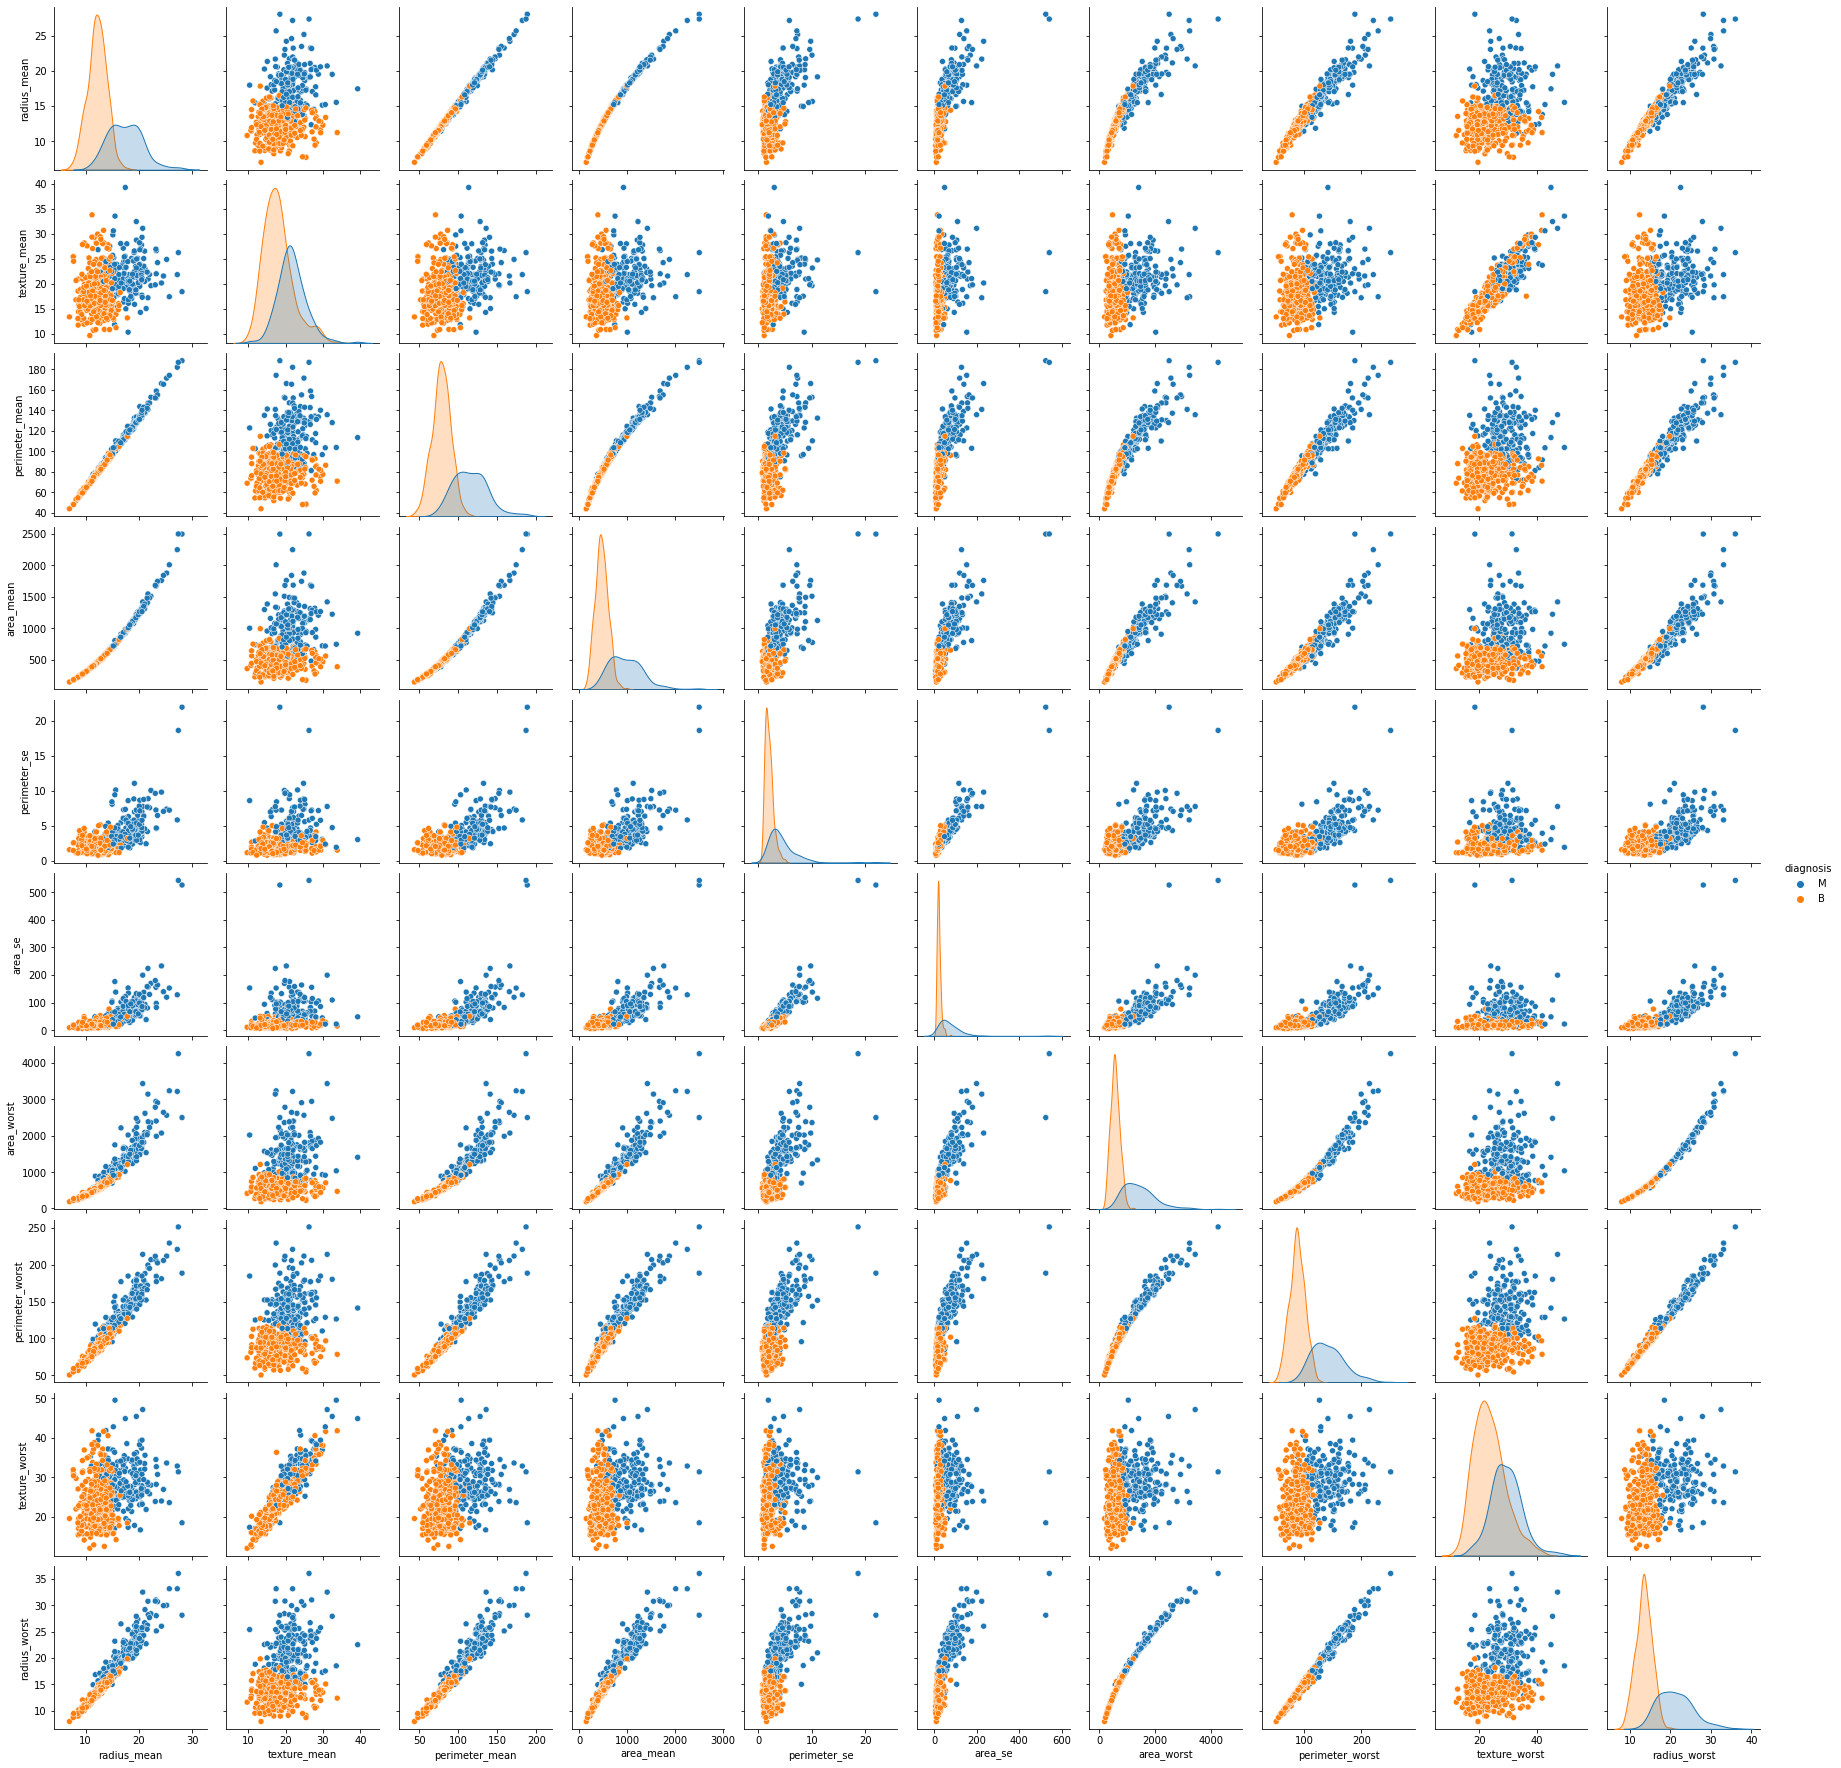

In [21]:
# isme best parameters daalenge
sns.pairplot(data, vars = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "perimeter_se", 
                           "area_se", "area_worst", "perimeter_worst", "texture_worst", "radius_worst"], hue ='diagnosis')

In [27]:
import plotly.express as px
from sklearn.decomposition import PCA

# df = px.data.iris()
# X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=3)
components = pca.fit_transform(x_train)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_train,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
# iska dekh lenge
import plotly.graph_objects as go
import plotly.offline as pyo

categories = x_train.columns
categories = [*categories, categories[0]]

restaurant_1 = [4, 4, 5, 4, 3]
restaurant_2 = [5, 5, 4, 5, 2]
restaurant_3 = [3, 4, 5, 3, 5]
restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=restaurant_1, theta=categories, name='Restaurant 1'),
        go.Scatterpolar(r=restaurant_2, theta=categories, name='Restaurant 2'),
        go.Scatterpolar(r=restaurant_3, theta=categories, name='Restaurant 3')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Restaurant comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)